# Proyek Analisis Data: Bike Racing
- **Nama:** Firdania Sasmita Sari
- **Email:** m135b4kx1518@bangkit.academy / firdania3103@gmail.com
- **ID Dicoding:** frdniiaa__

## Menentukan Pertanyaan Bisnis

- How productive is Bike Sharing on a monthly basis?
- How do weather and seasons affect Bike Sharing productivity?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

## Data Wrangling

### Gathering Data

In [ ]:
day = pd.read_csv('/content/sample_data/day.csv')
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
hour = pd.read_csv('/content/sample_data/hour.csv')
hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data



*   instant: Unique index for each entry.

*   dteday: date.

*  season: Season, represented by numbers 1: Winter, 2: Spring, 3: Summer, 4: Fall.
*   yr: Year, represented as a number (0:2011, 1:2012).


*   min: Months, represented by numbers (1-12).
holiday: Whether the day is a national holiday (1 if yes, 0 if not).


*   weekday: Day of the week (0: Sunday, 6: Saturday).

*   workingday: Whether the day is a working day (1 if yes, 0 if not).

*   weathersit: Weather conditions (1: Clear, 2: Mist, 3: Light Snow/Rain, 4: Heavy Rain/Snow).

*   temp: Normal temperature (0 to 1 scale, not straight degrees Celsius).
*   atemp: Perceived temperature, also on a scale (0 to 1).


*   hum: Humidity, on a scale of 0 to 1.

*   windspeed: Wind speed, on a scale of 0 to 1.
*   casual: Number of non-registered users.

*   registered: Number of registered users.
*   cnt: Total number of users (casual + registered).

**Day Dataframe**

In [ ]:
# check the data type of each column contained in hour and day_df.
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Hour Dataframe**

In [ ]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [ ]:
# check for missing values ​​in the day_df dataset
day.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [ ]:
# check for missing values ​​in the Hour dataset
hour.isna().sum

<bound method DataFrame.sum of        instant  dteday  season     yr   mnth     hr  holiday  weekday  \
0        False   False   False  False  False  False    False    False   
1        False   False   False  False  False  False    False    False   
2        False   False   False  False  False  False    False    False   
3        False   False   False  False  False  False    False    False   
4        False   False   False  False  False  False    False    False   
...        ...     ...     ...    ...    ...    ...      ...      ...   
17374    False   False   False  False  False  False    False    False   
17375    False   False   False  False  False  False    False    False   
17376    False   False   False  False  False  False    False    False   
17377    False   False   False  False  False  False    False    False   
17378    False   False   False  False  False  False    False    False   

       workingday  weathersit   temp  atemp    hum  windspeed  casual  \
0           False       False  False  False  False      False   False   
1           False       False  False  False  False      False   False   
2           False       False  False  False  False      False   False   
3           False       False  False  False  False      False   False   
4           False       False  False  False  False      False   False   
...           ...         ...    ...    ...    ...        ...     ...   
17374       False       False  False  False  False      False   False   
17375       False       False  False  False  False      False   False   
17376       False       False  False  False  False      False   False   
17377       False       False  False  False  False      False   False   
17378       False       False  False  False  False      False   False   

       registered    cnt  
0           False  False  
1           False  False  
2           False  False  
3           False  False  
4           False  False  
...           ...    ...  
17374       False  False  
17375       False  False  
17376       False  False  
17377       False  False  
17378       False  False  

[17379 rows x 17 columns]>

In [ ]:
# check for duplication
print("number of duplications: ", hour.duplicated().sum())
hour.describe()

number of duplications:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [ ]:
print("number of duplications: ", day.duplicated().sum())
day.describe()

number of duplications:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Cleaning Data

Delete the holiday column because the information in the column is already represented in the workingday column.

In [ ]:
day.drop('holiday', axis=1, inplace=True)

Changed some column header names to make it easier to understand and avoid writing errors

In [ ]:
day.rename(columns={'dteday':'date', 'yr':'year', 'mnth':'month', 'weekday':'day', 'weathersit':'weather',
                    'temp':'temperature', 'atemp':'temperature_feel', 'hum':'humidity', 'casual':'casual_user',
                    'registered':'registered_user', 'cnt':'total_user'}, inplace=True)


Change the data type of the date column from object to datetime

In [ ]:
datetime_columns = ['date']

for column in datetime_columns:
  day[column] = pd.to_datetime(day[column])

Convert seasons from numeric to actual values. The numbers in the season represent:
*   1 is springer
*   2 is summer
*   3 is fall
*   4 is winter





In [ ]:
def change_season(x):
    if x == 1:
        return 'springer'
    elif x == 2:
        return 'summer'
    elif x == 3:
        return 'fall'
    else:
        return 'winter'

day['season'] = day['season'].apply(change_season)
day.head()

,instant,date,season,year,month,day,workingday,weather,temperature,temperature_feel,humidity,windspeed,casual_user,registered_user,total_user
0,1,2011-01-01,springer,0,1,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,springer,0,1,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,springer,0,1,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,springer,0,1,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,springer,0,1,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600



Change the year with the following conditions:

0 means it is 2011
1 means it is 2012

In [ ]:
def change_year(x):
    if x == 0:
        return 2011
    else:
        return 2012

day['year'] = day['year'].apply(change_year)
day.head()

,instant,date,season,year,month,day,workingday,weather,temperature,temperature_feel,humidity,windspeed,casual_user,registered_user,total_user
0,1,2011-01-01,springer,2011,1,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,springer,2011,1,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,springer,2011,1,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,springer,2011,1,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,springer,2011,1,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
month_change = {1: 'january', 2: 'february', 3: 'march', 4:'april', 5:'may', 6:'june', 7:'july',
                8:'august', 9:'september', 10:'october', 11:'november', 12:'december'}

day['month'] = day['month'].map(month_change)
day.head(5)

,instant,date,season,year,month,day,workingday,weather,temperature,temperature_feel,humidity,windspeed,casual_user,registered_user,total_user
0,1,2011-01-01,springer,2011,january,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,springer,2011,january,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,springer,2011,january,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,springer,2011,january,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,springer,2011,january,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Convert weekday data to day names

In [ ]:
day_change = {0: 'monday', 1: 'tuesday', 2: 'wednesday', 3: 'thursday', 4:'friday', 5:'saturday', 6:'sunday'}

day['day'] = day['day'].map(day_change)
day.head(5)

,instant,date,season,year,month,day,workingday,weather,temperature,temperature_feel,humidity,windspeed,casual_user,registered_user,total_user
0,1,2011-01-01,springer,2011,january,sunday,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,springer,2011,january,monday,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,springer,2011,january,tuesday,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,springer,2011,january,wednesday,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,springer,2011,january,thursday,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Changing data on working days that were originally numeric to clarify the meaning of the data

In [ ]:
def change_workingday(x):
    if x == 0:
        return 'weekend/holiday'
    else:
        return 'working day'

day['workingday'] = day['workingday'].apply(change_workingday)
day.head()

,instant,date,season,year,month,day,workingday,weather,temperature,temperature_feel,humidity,windspeed,casual_user,registered_user,total_user
0,1,2011-01-01,springer,2011,january,sunday,weekend/holiday,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,springer,2011,january,monday,weekend/holiday,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,springer,2011,january,tuesday,working day,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,springer,2011,january,wednesday,working day,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,springer,2011,january,thursday,working day,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600



Change the weather data to better represent the real data with the following conditions
*   1 is clear
*   2 is mist
*   3 is light snow
*   4 is heavy rain

In [ ]:
def change_weather(x):
    if x == 1:
        return 'clear'
    elif x == 2:
        return 'mist'
    elif x == 3:
        return 'light snow'
    else:
        return 'heavy rain'

day['weather'] = day['weather'].apply(change_weather)
day.head()

,instant,date,season,year,month,day,workingday,weather,temperature,temperature_feel,humidity,windspeed,casual_user,registered_user,total_user
0,1,2011-01-01,springer,2011,january,sunday,weekend/holiday,mist,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,springer,2011,january,monday,weekend/holiday,mist,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,springer,2011,january,tuesday,working day,clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,springer,2011,january,wednesday,working day,clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,springer,2011,january,thursday,working day,clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:

def change_weather(x):
    if x == 1:
        return 'clear'
    elif x == 2:
        return 'mist'
    elif x == 3:
        return 'light snow'
    else:
        return 'heavy rain'

hour['weather'] = hour['weather'].apply(change_weather)
hour.head()

,instant,date,season,year,month,hour,day,workingday,weather,temperature,temperature_feel,humidity,windspeed,casual_user,registered_user,total_user
0,1,2011-01-01,1,0,1,0,6,0,clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,6,0,clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,6,0,clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,6,0,clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,6,0,clear,0.24,0.2879,0.75,0.0,0,1,1


### Exploratory Data Analysis (EDA)

### Explore ...

**Day Dataframe**

In [ ]:
day.describe(include="all")

,instant,date,season,year,month,day,workingday,weather,temperature,temperature_feel,humidity,windspeed,casual_user,registered_user,total_user
count,731.000000,731,731,731.000000,731,731,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4,NaN,12,7,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,fall,NaN,january,sunday,working day,clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188,NaN,62,105,500,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,2011.500684,NaN,NaN,NaN,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,2011.000000,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,2011.000000,NaN,NaN,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,2012.000000,NaN,NaN,NaN,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,2012.000000,NaN,NaN,NaN,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,2012.000000,NaN,NaN,NaN,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


From the data above it can be seen that users use Bike Sharing more frequently in autumn.

**Number of Daily Users**

In [ ]:
day.groupby(by="day").agg({
    "date": "nunique",
    "casual_user": "sum",
    "registered_user": "sum",
    "total_user": ["max", "min", "mean", "sum"]
})

date casual_user registered_user total_user                     \
          nunique         sum             sum        max   min         mean   
day                                                                           
friday        104       61460          423935       7804   431  4667.259615   
monday        105      140521          303506       8227   605  4228.828571   
saturday      104       78238          409552       8362  1167  4690.288462   
sunday        105      153852          323955       8714   627  4550.542857   
thursday      104       57319          415729       8173   441  4548.538462   
tuesday       105       70784          384719       7525    22  4338.123810   
wednesday     104       57843          411266       7767   683  4510.663462   

                   
              sum  
day                
friday     485395  
monday     444027  
saturday   487790  
sunday     477807  
thursday   473048  
tuesday    455503  
wednesday  469109

Based on the day, the most Bike Sharing users are on Saturdays with an average number of users of 4,690,288 people.

**Number of Monthly and Annual Users**

In [ ]:
day.groupby(by=["year", "month"]).agg({
    "date": "nunique",
    "casual_user": "sum",
    "registered_user": "sum",
    "total_user": ["max", "min", "mean", "sum"]
})

date casual_user registered_user total_user        \
               nunique         sum             sum        max   min   
year month                                                            
2011 april          30       22346           72524       5312   795   
     august         31       28842          107849       5895  1115   
     december       31        8448           78875       3940   705   
     february       28        6242           41973       2927  1005   
     january        31        3073           35116       1985   431   
     july           31       36452          104889       6043  3285   
     june           30       30612          112900       5515  3767   
     march          31       12826           51219       3239   605   
     may            31       31050          104771       5805  2633   
     november       30       15594           86573       4486  1495   
     october        31       25222           98289       5511   627   
     september      30       26545          100873       5423  1842   
2012 april          30       38456          135768       7460  1027   
     august         31       43197          171306       7865  4549   
     december       31       13245          110468       6606   441   
     february       29        8721           94416       5062  1529   
     january        31        8969           87775       4521  1301   
     july           31       41705          161902       8173  4459   
     june           30       43294          159536       8120  4127   
     march          31       31618          133257       8362  3194   
     may            31       44235          151630       8294  2843   
     november       30       21009          131655       6852  2277   
     october        31       34538          164303       8156    22   
     september      30       43778          174795       8714  4073   

                                     
                       mean     sum  
year month                           
2011 april      3162.333333   94870  
     august     4409.387097  136691  
     december   2816.870968   87323  
     february   1721.964286   48215  
     january    1231.903226   38189  
     july       4559.387097  141341  
     june       4783.733333  143512  
     march      2065.967742   64045  
     may        4381.322581  135821  
     november   3405.566667  102167  
     october    3984.225806  123511  
     september  4247.266667  127418  
2012 april      5807.466667  174224  
     august     6919.451613  214503  
     december   3990.741935  123713  
     february   3556.448276  103137  
     january    3120.774194   96744  
     july       6567.967742  203607  
     june       6761.000000  202830  
     march      5318.548387  164875  
     may        6318.225806  195865  
     november   5088.800000  152664  
     october    6414.225806  198841  
     september  7285.766667  218573


In 2011 the most Bike Sharing users were in June with a total of 143,512 users. In 2012 the most Bike Sharing users were in September with a total of 218,573 users.


**Hour Dataframe**

In [ ]:
hour.describe(include="all")

,instant,date,season,year,month,hour,day,workingday,weather,temperature,temperature_feel,humidity,windspeed,casual_user,registered_user,total_user
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,3.003683,0.682721,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,1.000000,0.000000,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,3.000000,1.000000,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,5.000000,1.000000,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,6.000000,1.000000,NaN,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


From the data above it can be seen that users use Bike Sharing more frequently in autumn.

**Number of Users Every Hour Based on Working Days**

In [ ]:
hour.groupby(by=["workingday", "hour"]).agg({
    "date": "nunique",
    "casual_user": "sum",
    "registered_user": "sum",
    "total_user": ["max", "min", "mean", "sum"]
})

date casual_user registered_user total_user      \
                nunique         sum             sum        max min   
workingday hour                                                      
0          0        230        3829           17055        249   6   
           1        230        2876           13111        168   4   
           2        228        2371            9752        132   2   
           3        227        1465            4386         79   2   
           4        227         514            1362         28   1   
           5        222         383            1546         55   1   
           6        229         875            3417        133   1   
           7        231        1988            8039        387   1   
           8        231        4718           19688        597   5   
           9        231       10399           29246        397  14   
           10       231       18311           40804        539  12   
           11       231       24637           48201        663  27   
           12       231       29163           55443        776  32   
           13       231       31514           54587        760  30   
           14       231       32246           51987        750  23   
           15       231       31532           51354        750   7   
           16       231       29710           51770        783  11   
           17       231       25829           48911        731  15   
           18       230       19371           45272        676  23   
           19       230       15076           38209        554  11   
           20       230       10756           29434        551  11   
           21       230        8314           24360        584   7   
           22       230        6453           20241        502   9   
           23       230        4402           15362        239   2   
1          0        496        3546           14700        283   2   
           1        494        1833            6344        114   1   
           2        487        1041            3188         74   1   
           3        470         428            1895         36   1   
           4        470         360            2192         17   1   
           5        495         629           11703         66   1   
           6        496        2142           48698        213   7   
           7        496        6049          138095        596  18   
           8        496       11043          225552        839  31   
           9        496       12059          107734        426  23   
           10       496       15478           51664        275   8   
           11       496       18649           59833        361  10   
           12       497       20555           79253        471   3   
           13       498       21199           77619        428  11   
           14       498       22843           68576        651  12   
           15       498       23074           77189        601  13   
           16       499       24124          122144        634  13   
           17       499       28391          233729        976  26   
           18       498       25125          220004        977  26   
           19       498       20429          153075        743  18   
           20       498       15622          108738        567  23   
           21       498       12256           80515        398   6   
           22       498        9747           59171        321  11   
           23       498        6663           37514        256   9   

                                     
                       mean     sum  
workingday hour                      
0          0      90.800000   20884  
           1      69.508696   15987  
           2      53.171053   12123  
           3      25.775330    5851  
           4       8.264317    1876  
           5       8.689189    1929  
           6      18.742358    4292  
           7      43.406926   10027  
           8     105.653680   


On weekends or holidays, the most users are at 13.00 with a total of 86,101 users. While on weekdays, the most users are at 17.00 with a total of 262,120 users.

**Number of Users by Weather and Season**

In [ ]:
hour.groupby(by=["season", "weather"]).agg({
    "date": "nunique",
    "casual_user": "sum",
    "registered_user": "sum",
    "total_user": ["max", "min", "mean", "sum"]
})

date casual_user registered_user total_user      \
                  nunique         sum             sum        max min   
season weather                                                         
1      clear          174       44462          280816        801   1   
       heavy rain       3           8             215        164  23   
       light snow      75        1392           20250        520   1   
       mist           146       14760          109445        712   1   
2      clear          177      151197          513266        873   1   
       light snow      91        7413           39350        782   1   
       mist           146       44912          162451        957   1   
3      clear          183      174014          627927        977   1   
       light snow      72        9727           36529        891   1   
       mist           140       42350          170582        868   2   
4      clear          166       93072          453419        967   1   
       light snow      62        4251           39419        856   1   
       mist           135       32459          218993        905   1   

                                       
                         mean     sum  
season weather                         
1      clear       122.055535  325278  
       heavy rain   74.333333     223  
       light snow   58.650407   21642  
       mist        103.074689  124205  
2      clear       232.410983  664463  
       light snow  115.179803   46763  
       mist        181.261364  207363  
3      clear       244.494207  801941  
       light snow  171.955390   46256  
       mist        224.848997  212932  
4      clear       209.463779  546491  
       light snow  116.453333   43670  
       mist        201.483974  251452


Based on the season and weather conditions, the most users are in autumn during sunny weather with a total of 801,941 users. While the least users are in spring during heavy rainy weather with a total of 223 users.

## Visualization & Explanatory Analysis

### Bike Sharing Productivity by Month (Question 1)

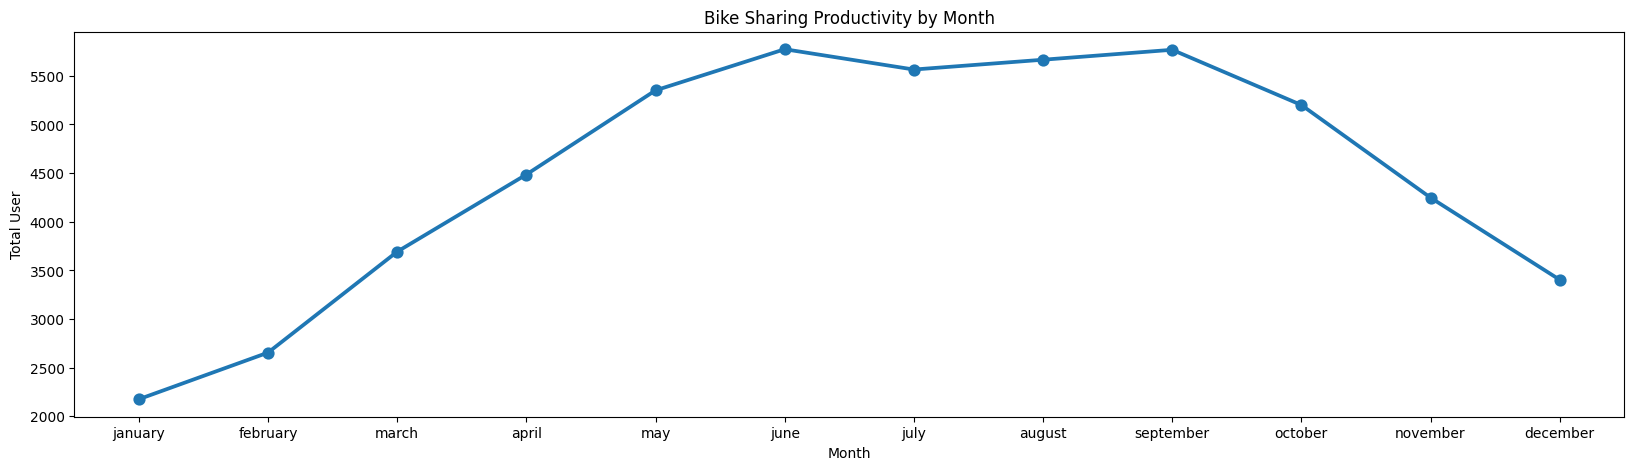

In [ ]:
fig, ax = plt.subplots(figsize=(20,5))
sns.pointplot(data=day, x='month', y='total_user', errorbar=None, ax=ax)
ax.set(title='Bike Sharing Productivity by Month')
ax.set_ylabel('Total User')
ax.set_xlabel('Month')
plt.show()


Bike Sharing has a very high productivity in June and September with many users renting bicycles in these months. While starting in October the number of users continued to decline until the lowest point in January. The number of users increased again starting in February

### Weather and Season Impact on Bike Sharing Productivity (Question 2)

In [ ]:
byweather = hour.groupby("weather").total_user.sum().sort_values(ascending=False).reset_index()
byweather

,weather,total_user
0,clear,2338173
1,mist,795952
2,light snow,158331
3,heavy rain,223


In [ ]:
byseason = hour.groupby("season").total_user.sum().sort_values(ascending=False).reset_index()
byseason

,season,total_user
0,3,1061129
1,2,918589
2,4,841613
3,1,471348


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

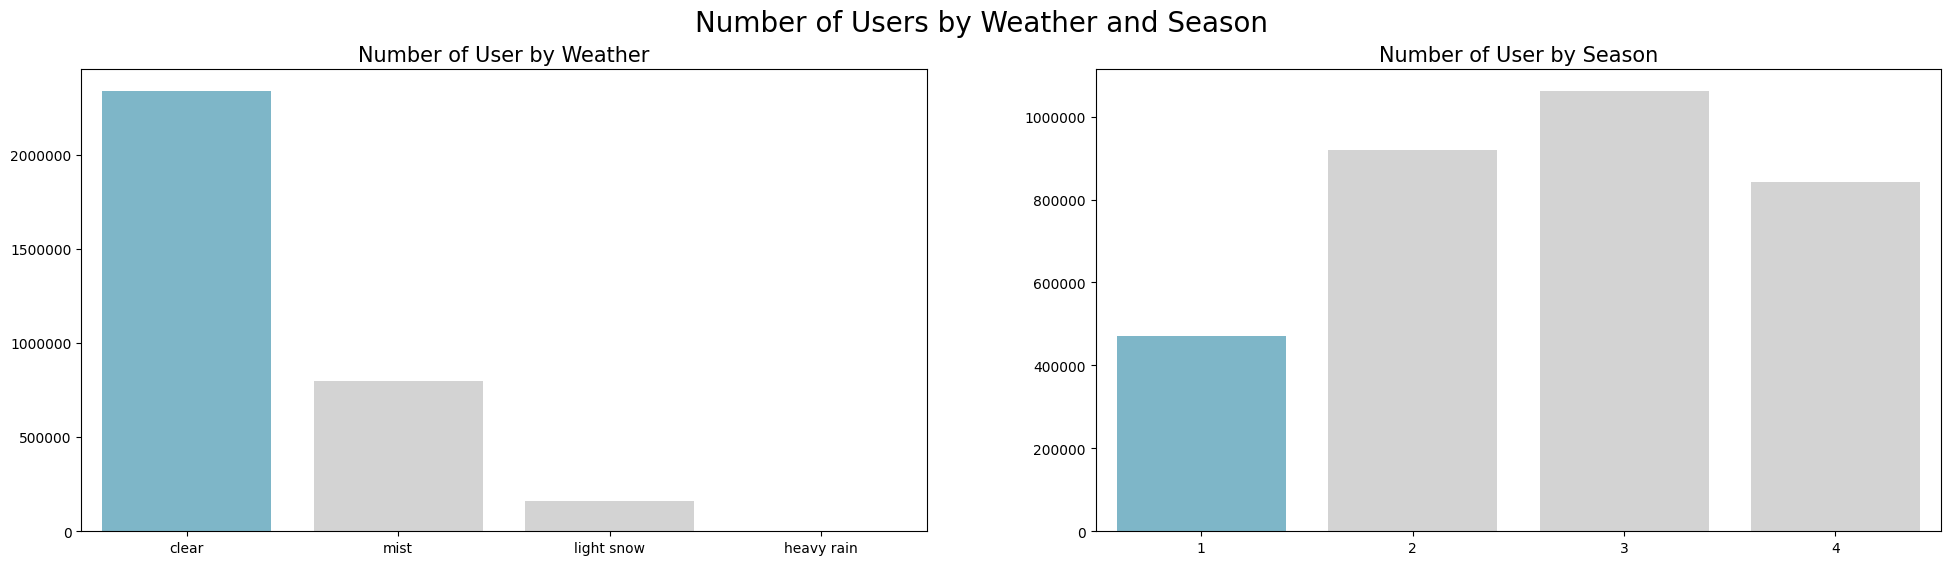

In [ ]:
ig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(y="total_user", x="weather", data=byweather.sort_values(by="total_user", ascending=False), palette=colors, hue="weather", legend=False, ax=ax[0])
ax[0].set_title("Number of User by Weather", loc="center", fontsize=15)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].ticklabel_format(style='plain', axis='y')

sns.barplot(y="total_user", x="season", data=byseason.sort_values(by="total_user", ascending=False), palette=colors, hue="season", legend=False, ax=ax[1])
ax[1].set_title("Number of User by Season", loc="center", fontsize=15)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].ticklabel_format(style='plain', axis='y')

plt.suptitle("Number of Users by Weather and Season", fontsize=20)
plt.show()

Based on weather conditions, Bike Sharing has a very high productivity during sunny or slightly cloudy weather with 2,338,173 users. While in times of heavy rain, storms, snow, or fog Bike Sharing productivity is very low with only 223 users.

When viewed by season, the highest productivity occurs in autumn with a total of 1,061,129 users. While the lowest productivity occurred in spring with 471,348 users.

## Analisis Lanjutan (Opsional)

## RFM Analysis

In [ ]:
rfm_df = day.groupby(by="day", as_index=False).agg({
    "date": "max", # retrieve the date of the last order
    "instant": "nunique", # calculate the order quantity
    "total_user": "sum" # calculate the amount of revenue generated
})

rfm_df.columns = ["day", "max_order_timestamp", "frequency", "monetary"]

# calculates when the customer last made a transaction (days)
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = day["date"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)

rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df

,day,frequency,monetary,recency
0,friday,104,485395,4
1,monday,105,444027,1
2,saturday,104,487790,3
3,sunday,105,477807,2
4,thursday,104,473048,5
5,tuesday,105,455503,0
6,wednesday,104,469109,6


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

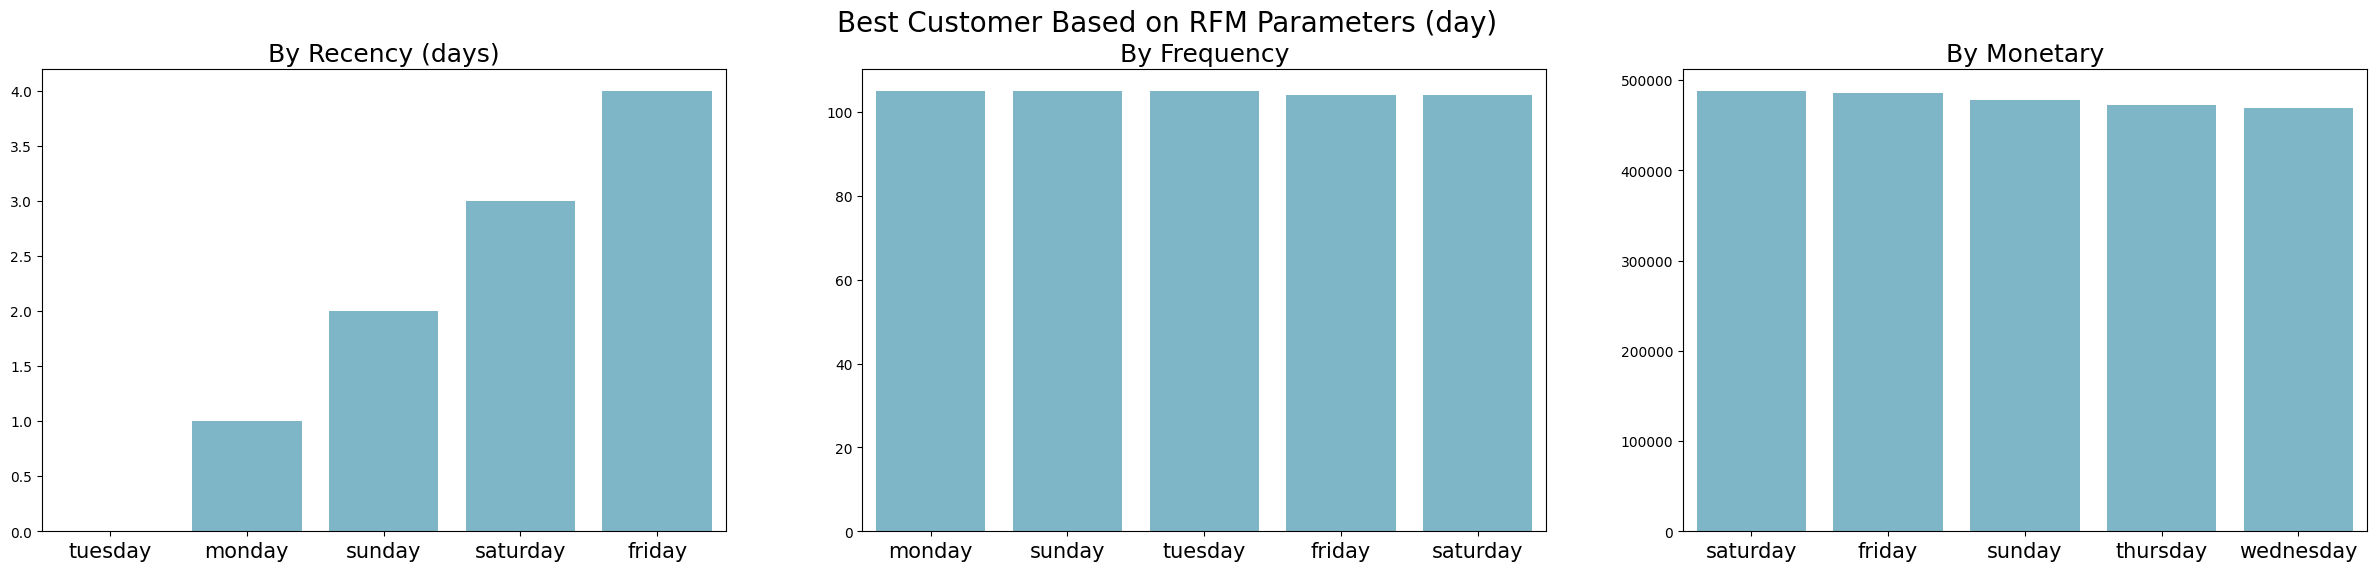

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(y="recency", x="day", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, hue="day", legend=False, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)

sns.barplot(y="frequency", x="day", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, hue="day", legend=False, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

sns.barplot(y="monetary", x="day", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, hue="day", legend=False, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)

plt.suptitle("Best Customer Based on RFM Parameters (day)", fontsize=20)
plt.show()

## Conclusion

- Overall, there were more registered users than casual users. Registered users were most prevalent on Friday, while casual users were most prevalent on Sunday.
- On weekdays, users were most prevalent during commuting and work hours, while on holidays/weekends users were most prevalent during the afternoon to evening around 12.00 to 16.00.
- Bike Sharing users are relatively few from midnight to 5am.
- September and June are the months with the most Bike Sharing users.
- Bike Sharing users are more in sunny weather and very few in heavy rainy weather.
- Bike Sharing users are most abundant in autumn.

**Export Clean Dataset**

In [ ]:
day.to_csv("dashboard/day_clean.csv", index=False)